# Career Path Prediction and Guidance System

#### Problem:

The project involves developing a tool called the Career Path Prediction and Guidance System. This tool will utilize deep learning concepts to evaluate students' academic records, skills, interests, and achievements. The goal is to provide professional recommendations to help students choose the most suitable career paths. The tool aims to offer personalized career advice by analyzing students' data and suggesting the best career options, thereby helping students achieve their occupational dreams.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv('../dataset/PS2_Dataset.csv')
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [5]:
df.isnull().sum()

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

### EDA

In [6]:
df.describe()

,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,6901.000000,6901.000000,6901.000000,6901.000000
mean,4.991016,2.999710,5.010723,4.988263
std,2.577704,2.010191,2.568347,2.599500
min,1.000000,0.000000,1.000000,1.000000
25%,3.000000,1.000000,3.000000,3.000000
50%,5.000000,3.000000,5.000000,5.000000
75%,7.000000,5.000000,7.000000,7.000000
max,9.000000,6.000000,9.000000,9.000000


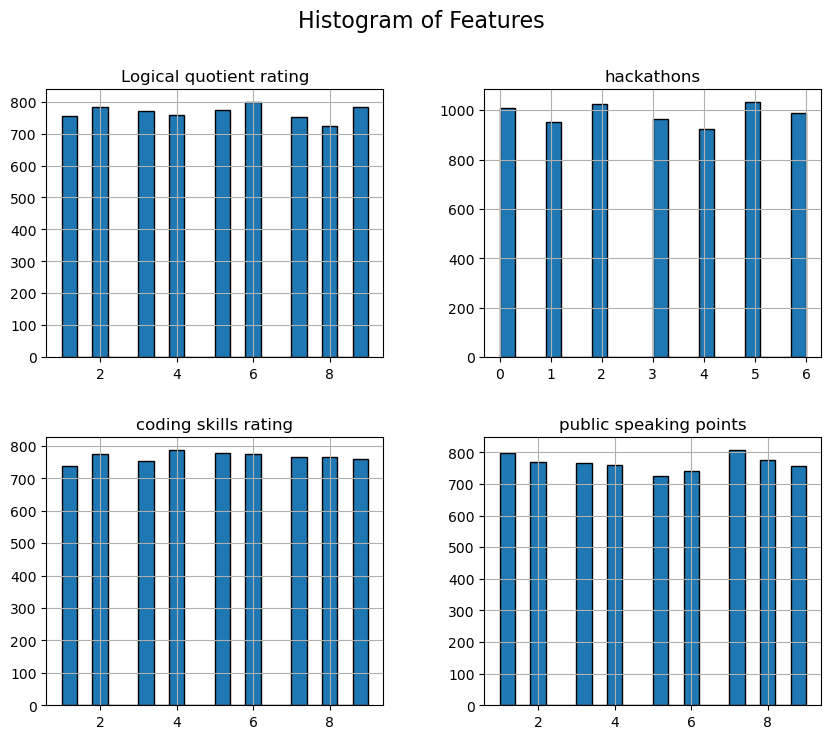

In [7]:
df.hist(figsize=(10, 8), bins=20, edgecolor='k')
plt.suptitle('Histogram of Features', fontsize=16)
plt.show()

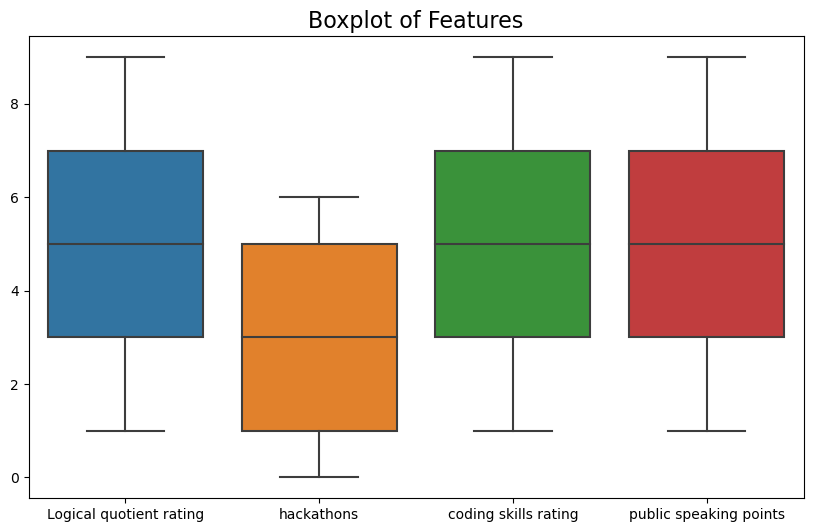

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features', fontsize=16)
plt.show()

C:\Users\suman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suman\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

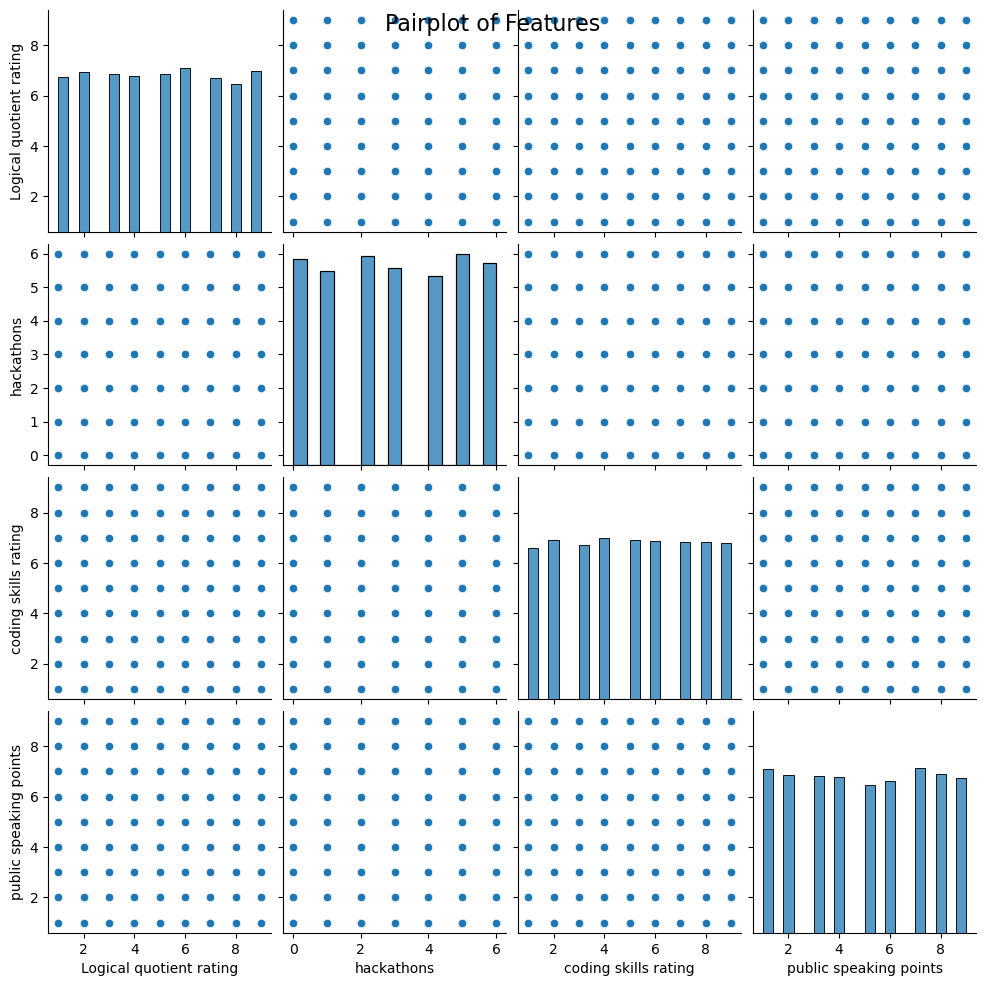

In [9]:
sns.pairplot(df)
plt.suptitle('Pairplot of Features', fontsize=16)
plt.show()

### Data Preprocessing

In [10]:
df.columns

Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')

In [11]:
df.shape

(6901, 20)

In [12]:
# Remove less important columns
df = df.drop(columns=['Logical quotient rating', 'public speaking points', 'Interested subjects', 'Interested Type of Books', 'Type of company want to settle in?', 'Introvert'])

In [13]:
for col in df.columns:
    if (df[col].dtype=='object'):
        print(f"{col} : {df[col].unique()}")

self-learning capability? : ['yes' 'no']
Extra-courses did : ['no' 'yes']
certifications : ['information security' 'shell programming' 'r programming'
 'distro making' 'machine learning' 'full stack' 'hadoop'
 'app development' 'python']
workshops : ['testing' 'database security' 'game development' 'data science'
 'system designing' 'hacking' 'cloud computing' 'web technologies']
reading and writing skills : ['poor' 'excellent' 'medium']
memory capability score : ['poor' 'medium' 'excellent']
interested career area  : ['testing' 'system developer' 'Business process analyst' 'security'
 'developer' 'cloud computing']
Taken inputs from seniors or elders : ['no' 'yes']
Management or Technical : ['Management' 'Technical']
hard/smart worker : ['smart worker' 'hard worker']
worked in teams ever? : ['yes' 'no']
Suggested Job Role : ['Applications Developer' 'CRM Technical Developer' 'Database Developer'
 'Mobile Applications Developer' 'Network Security Engineer'
 'Software Developer' 'Softwa

In [14]:
df.shape

(6901, 14)

In [15]:
# Separate features and target
X = df.drop(columns=['Suggested Job Role'])
y = df['Suggested Job Role']

X.shape, y.shape

((6901, 13), (6901,))

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [17]:
# Preprocess features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64']).columns

In [18]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Model Training

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

### RandomForest model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [23]:
# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 4]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [24]:
# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate
print(f'RandomForest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

RandomForest Accuracy: 0.07892831281679942


In [25]:
print('RandomForest Classification Report:')
print(classification_report(y_test, y_pred_rf))

RandomForest Classification Report:
                                           precision    recall  f1-score   support

                   Applications Developer       0.07      0.04      0.05       132
                  CRM Technical Developer       0.08      0.09      0.08       105
                       Database Developer       0.07      0.06      0.06       123
            Mobile Applications Developer       0.07      0.06      0.06       100
                Network Security Engineer       0.07      0.08      0.08       121
                       Software Developer       0.07      0.09      0.08       113
                        Software Engineer       0.07      0.08      0.07       116
Software Quality Assurance (QA) / Testing       0.07      0.08      0.07       118
           Systems Security Administrator       0.08      0.06      0.07       114
                        Technical Support       0.10      0.10      0.10       111
                              UX Designer       0.

### XGBoost

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [27]:
import xgboost as xgb

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

In [28]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train_encoded)
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\suman\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
y_pred_xgb = best_xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb)}')
print('XGBoost Classification Report:')
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))

XGBoost Accuracy: 0.07241129616220131
XGBoost Classification Report:
                                           precision    recall  f1-score   support

                   Applications Developer       0.07      0.03      0.04       132
                  CRM Technical Developer       0.08      0.09      0.08       105
                       Database Developer       0.06      0.06      0.06       123
            Mobile Applications Developer       0.01      0.01      0.01       100
                Network Security Engineer       0.09      0.15      0.11       121
                       Software Developer       0.06      0.05      0.05       113
                        Software Engineer       0.06      0.06      0.06       116
Software Quality Assurance (QA) / Testing       0.07      0.05      0.06       118
           Systems Security Administrator       0.08      0.09      0.09       114
                        Technical Support       0.10      0.10      0.10       111
                 

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [31]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 4]
}

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train_encoded)
best_dt_model = grid_search_dt.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [32]:
# Evaluate Decision Tree Model
y_pred_dt = best_dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test_encoded, y_pred_dt)}')
print('Decision Tree Classification Report:')
print(classification_report(y_test_encoded, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Accuracy: 0.08037653874004344
Decision Tree Classification Report:
                                           precision    recall  f1-score   support

                   Applications Developer       0.09      0.11      0.10       132
                  CRM Technical Developer       0.07      0.11      0.09       105
                       Database Developer       0.06      0.06      0.06       123
            Mobile Applications Developer       0.09      0.11      0.10       100
                Network Security Engineer       0.07      0.07      0.07       121
                       Software Developer       0.06      0.07      0.07       113
                        Software Engineer       0.09      0.09      0.09       116
Software Quality Assurance (QA) / Testing       0.08      0.06      0.07       118
           Systems Security Administrator       0.08      0.07      0.07       114
                        Technical Support       0.07      0.06      0.07       111
     

### Artificial Neural Network (ANN)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [34]:
# Preprocess the data for the neural network
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [35]:
input_dim = X_train_preprocessed.shape[1]
num_classes = len(label_encoder.classes_)

ann_model = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\suman\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ANN model
history = ann_model.fit(X_train_preprocessed, y_train_encoded, epochs=2000, batch_size=32, validation_split=0.2)

Epoch 1/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3313 - loss: 1.9354 - val_accuracy: 0.0688 - val_loss: 2.8707
Epoch 2/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3309 - loss: 1.9374 - val_accuracy: 0.0625 - val_loss: 2.8633
Epoch 3/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3310 - loss: 1.9411 - val_accuracy: 0.0616 - val_loss: 2.8889
Epoch 4/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3355 - loss: 1.9341 - val_accuracy: 0.0688 - val_loss: 2.8810
Epoch 5/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3364 - loss: 1.9172 - val_accuracy: 0.0770 - val_loss: 2.8858
Epoch 6/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3530 - loss: 1.9084 - val_accuracy: 0.0716 - val_loss: 2.9014
Epoch 7/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3260 - loss: 1.9305 - val_accuracy: 0.0670 - val_loss: 2.8986
Epoch 8/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3589 - loss: 1.9034 - 

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3643 - loss: 1.8589 - val_accuracy: 0.0688 - val_loss: 2.9451
Epoch 51/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3711 - loss: 1.8447 - val_accuracy: 0.0670 - val_loss: 2.9453
Epoch 52/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3596 - loss: 1.8667 - val_accuracy: 0.0770 - val_loss: 2.9392
Epoch 53/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3774 - loss: 1.8455 - val_accuracy: 0.0707 - val_loss: 2.9343
Epoch 54/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3585 - loss: 1.8381 - val_accuracy: 0.0743 - val_loss: 2.9425
Epoch 55/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3633 - loss: 1.8626 - val_accuracy: 0.0806 - val_loss: 2.9293
Epoch 56/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3613 - loss: 1.8565 - val_accuracy: 0.0788 - val_loss: 2.9261
Epoch 57/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3625 - loss: 1.8645 - val_ac

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3848 - loss: 1.8055 - val_accuracy: 0.0752 - val_loss: 2.9649
Epoch 100/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3756 - loss: 1.8105 - val_accuracy: 0.0734 - val_loss: 2.9438
Epoch 101/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3842 - loss: 1.8156 - val_accuracy: 0.0779 - val_loss: 2.9526
Epoch 102/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3541 - loss: 1.8323 - val_accuracy: 0.0806 - val_loss: 2.9544
Epoch 103/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3753 - loss: 1.8126 - val_accuracy: 0.0725 - val_loss: 2.9562
Epoch 104/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3869 - loss: 1.8139 - val_accuracy: 0.0697 - val_loss: 2.9569
Epoch 105/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3571 - loss: 1.8735 - val_accuracy: 0.0851 - val_loss: 2.9528
Epoch 106/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3831 - loss: 1.8263 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3729 - loss: 1.8047 - val_accuracy: 0.0697 - val_loss: 3.0093
Epoch 149/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3878 - loss: 1.7852 - val_accuracy: 0.0779 - val_loss: 3.0048
Epoch 150/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3777 - loss: 1.8121 - val_accuracy: 0.0625 - val_loss: 3.0212
Epoch 151/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3720 - loss: 1.8124 - val_accuracy: 0.0679 - val_loss: 3.0071
Epoch 152/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3927 - loss: 1.7905 - val_accuracy: 0.0716 - val_loss: 2.9982
Epoch 153/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3801 - loss: 1.7801 - val_accuracy: 0.0679 - val_loss: 3.0134
Epoch 154/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3977 - loss: 1.7648 - val_accuracy: 0.0670 - val_loss: 3.0377
Epoch 155/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3737 - loss: 1.8060 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4053 - loss: 1.7462 - val_accuracy: 0.0725 - val_loss: 3.0446
Epoch 198/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 1.7795 - val_accuracy: 0.0734 - val_loss: 3.0315
Epoch 199/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3970 - loss: 1.7570 - val_accuracy: 0.0688 - val_loss: 3.0223
Epoch 200/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4120 - loss: 1.7102 - val_accuracy: 0.0697 - val_loss: 3.0504
Epoch 201/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3932 - loss: 1.7452 - val_accuracy: 0.0688 - val_loss: 3.0324
Epoch 202/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4224 - loss: 1.7126 - val_accuracy: 0.0661 - val_loss: 3.0361
Epoch 203/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4183 - loss: 1.7143 - val_accuracy: 0.0679 - val_loss: 3.0526
Epoch 204/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4042 - loss: 1.7516 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4053 - loss: 1.7551 - val_accuracy: 0.0851 - val_loss: 3.0358
Epoch 247/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4071 - loss: 1.7716 - val_accuracy: 0.0888 - val_loss: 3.0141
Epoch 248/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4173 - loss: 1.7398 - val_accuracy: 0.0951 - val_loss: 3.0142
Epoch 249/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4117 - loss: 1.7451 - val_accuracy: 0.0833 - val_loss: 3.0362
Epoch 250/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4137 - loss: 1.7068 - val_accuracy: 0.0969 - val_loss: 3.0297
Epoch 251/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4286 - loss: 1.7223 - val_accuracy: 0.0888 - val_loss: 3.0390
Epoch 252/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4212 - loss: 1.6934 - val_accuracy: 0.0915 - val_loss: 3.0459
Epoch 253/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4054 - loss: 1.7703 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4165 - loss: 1.6996 - val_accuracy: 0.0707 - val_loss: 3.0617
Epoch 296/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4048 - loss: 1.7404 - val_accuracy: 0.0725 - val_loss: 3.0740
Epoch 297/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3827 - loss: 1.7554 - val_accuracy: 0.0725 - val_loss: 3.0592
Epoch 298/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4204 - loss: 1.7205 - val_accuracy: 0.0707 - val_loss: 3.0669
Epoch 299/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4141 - loss: 1.7284 - val_accuracy: 0.0770 - val_loss: 3.0742
Epoch 300/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4080 - loss: 1.7372 - val_accuracy: 0.0788 - val_loss: 3.0639
Epoch 301/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4169 - loss: 1.7191 - val_accuracy: 0.0842 - val_loss: 3.0549
Epoch 302/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4237 - loss: 1.6932 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4218 - loss: 1.6985 - val_accuracy: 0.0743 - val_loss: 3.1037
Epoch 345/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4303 - loss: 1.6991 - val_accuracy: 0.0734 - val_loss: 3.1160
Epoch 346/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4109 - loss: 1.7149 - val_accuracy: 0.0716 - val_loss: 3.0838
Epoch 347/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4202 - loss: 1.7293 - val_accuracy: 0.0707 - val_loss: 3.0786
Epoch 348/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4248 - loss: 1.6912 - val_accuracy: 0.0707 - val_loss: 3.0941
Epoch 349/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4218 - loss: 1.7175 - val_accuracy: 0.0643 - val_loss: 3.0910
Epoch 350/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4111 - loss: 1.7151 - val_accuracy: 0.0743 - val_loss: 3.0826
Epoch 351/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4118 - loss: 1.7255 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4246 - loss: 1.6921 - val_accuracy: 0.0670 - val_loss: 3.0826
Epoch 394/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4363 - loss: 1.6894 - val_accuracy: 0.0707 - val_loss: 3.0742
Epoch 395/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4108 - loss: 1.7241 - val_accuracy: 0.0688 - val_loss: 3.0902
Epoch 396/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4112 - loss: 1.7283 - val_accuracy: 0.0679 - val_loss: 3.0852
Epoch 397/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4038 - loss: 1.7133 - val_accuracy: 0.0725 - val_loss: 3.0709
Epoch 398/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4332 - loss: 1.6723 - val_accuracy: 0.0788 - val_loss: 3.0746
Epoch 399/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4355 - loss: 1.6912 - val_accuracy: 0.0679 - val_loss: 3.0814
Epoch 400/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4210 - loss: 1.6920 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4359 - loss: 1.6857 - val_accuracy: 0.0824 - val_loss: 3.0824
Epoch 443/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4465 - loss: 1.6543 - val_accuracy: 0.0779 - val_loss: 3.0669
Epoch 444/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4235 - loss: 1.7006 - val_accuracy: 0.0770 - val_loss: 3.0561
Epoch 445/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4184 - loss: 1.7308 - val_accuracy: 0.0788 - val_loss: 3.0713
Epoch 446/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4248 - loss: 1.6994 - val_accuracy: 0.0697 - val_loss: 3.0760
Epoch 447/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4290 - loss: 1.6769 - val_accuracy: 0.0725 - val_loss: 3.0732
Epoch 448/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4115 - loss: 1.7328 - val_accuracy: 0.0697 - val_loss: 3.0776
Epoch 449/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4165 - loss: 1.7328 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4174 - loss: 1.6815 - val_accuracy: 0.0688 - val_loss: 3.1134
Epoch 492/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4240 - loss: 1.7025 - val_accuracy: 0.0725 - val_loss: 3.0898
Epoch 493/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4648 - loss: 1.6223 - val_accuracy: 0.0707 - val_loss: 3.1080
Epoch 494/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4270 - loss: 1.6995 - val_accuracy: 0.0707 - val_loss: 3.1270
Epoch 495/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4422 - loss: 1.6442 - val_accuracy: 0.0725 - val_loss: 3.1036
Epoch 496/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4338 - loss: 1.6704 - val_accuracy: 0.0725 - val_loss: 3.1231
Epoch 497/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4286 - loss: 1.6741 - val_accuracy: 0.0770 - val_loss: 3.1394
Epoch 498/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4189 - loss: 1.7142 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4245 - loss: 1.6541 - val_accuracy: 0.0743 - val_loss: 3.1254
Epoch 541/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4483 - loss: 1.6701 - val_accuracy: 0.0752 - val_loss: 3.1063
Epoch 542/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4331 - loss: 1.6548 - val_accuracy: 0.0716 - val_loss: 3.1032
Epoch 543/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4220 - loss: 1.6920 - val_accuracy: 0.0824 - val_loss: 3.1050
Epoch 544/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4420 - loss: 1.6448 - val_accuracy: 0.0725 - val_loss: 3.1029
Epoch 545/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4395 - loss: 1.6550 - val_accuracy: 0.0779 - val_loss: 3.1155
Epoch 546/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4372 - loss: 1.6538 - val_accuracy: 0.0707 - val_loss: 3.1066
Epoch 547/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4525 - loss: 1.6322 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4424 - loss: 1.6494 - val_accuracy: 0.0833 - val_loss: 3.0880
Epoch 590/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4297 - loss: 1.6874 - val_accuracy: 0.0752 - val_loss: 3.1030
Epoch 591/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4401 - loss: 1.6800 - val_accuracy: 0.0779 - val_loss: 3.0975
Epoch 592/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4382 - loss: 1.6574 - val_accuracy: 0.0797 - val_loss: 3.1073
Epoch 593/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4426 - loss: 1.6800 - val_accuracy: 0.0761 - val_loss: 3.1139
Epoch 594/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4516 - loss: 1.6326 - val_accuracy: 0.0770 - val_loss: 3.1078
Epoch 595/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4442 - loss: 1.6625 - val_accuracy: 0.0679 - val_loss: 3.1060
Epoch 596/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4512 - loss: 1.6442 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4321 - loss: 1.6710 - val_accuracy: 0.0770 - val_loss: 3.1107
Epoch 639/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4305 - loss: 1.6657 - val_accuracy: 0.0788 - val_loss: 3.1170
Epoch 640/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4455 - loss: 1.6451 - val_accuracy: 0.0815 - val_loss: 3.1219
Epoch 641/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4462 - loss: 1.6465 - val_accuracy: 0.0797 - val_loss: 3.1087
Epoch 642/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4526 - loss: 1.6360 - val_accuracy: 0.0788 - val_loss: 3.1209
Epoch 643/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4255 - loss: 1.6980 - val_accuracy: 0.0851 - val_loss: 3.1203
Epoch 644/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4471 - loss: 1.6535 - val_accuracy: 0.0716 - val_loss: 3.1152
Epoch 645/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4604 - loss: 1.6193 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4456 - loss: 1.6569 - val_accuracy: 0.0797 - val_loss: 3.1200
Epoch 688/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4505 - loss: 1.6611 - val_accuracy: 0.0770 - val_loss: 3.1122
Epoch 689/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4455 - loss: 1.6307 - val_accuracy: 0.0842 - val_loss: 3.1182
Epoch 690/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4296 - loss: 1.6655 - val_accuracy: 0.0870 - val_loss: 3.1064
Epoch 691/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4540 - loss: 1.6194 - val_accuracy: 0.0833 - val_loss: 3.1245
Epoch 692/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4372 - loss: 1.6595 - val_accuracy: 0.0888 - val_loss: 3.1331
Epoch 693/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4493 - loss: 1.6353 - val_accuracy: 0.0833 - val_loss: 3.1385
Epoch 694/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4505 - loss: 1.6468 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4392 - loss: 1.6842 - val_accuracy: 0.0725 - val_loss: 3.1175
Epoch 737/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4616 - loss: 1.6229 - val_accuracy: 0.0761 - val_loss: 3.1411
Epoch 738/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4281 - loss: 1.6801 - val_accuracy: 0.0752 - val_loss: 3.1345
Epoch 739/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4278 - loss: 1.6719 - val_accuracy: 0.0797 - val_loss: 3.1144
Epoch 740/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4279 - loss: 1.6607 - val_accuracy: 0.0743 - val_loss: 3.1392
Epoch 741/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4420 - loss: 1.6323 - val_accuracy: 0.0815 - val_loss: 3.1320
Epoch 742/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4520 - loss: 1.6351 - val_accuracy: 0.0806 - val_loss: 3.1373
Epoch 743/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4499 - loss: 1.6209 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4424 - loss: 1.6402 - val_accuracy: 0.0797 - val_loss: 3.1473
Epoch 786/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4542 - loss: 1.6423 - val_accuracy: 0.0734 - val_loss: 3.1521
Epoch 787/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4491 - loss: 1.6255 - val_accuracy: 0.0697 - val_loss: 3.1557
Epoch 788/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4568 - loss: 1.6055 - val_accuracy: 0.0761 - val_loss: 3.1663
Epoch 789/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4538 - loss: 1.6424 - val_accuracy: 0.0752 - val_loss: 3.1619
Epoch 790/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4549 - loss: 1.6136 - val_accuracy: 0.0788 - val_loss: 3.1818
Epoch 791/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4330 - loss: 1.6520 - val_accuracy: 0.0797 - val_loss: 3.1540
Epoch 792/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4518 - loss: 1.6065 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4760 - loss: 1.6085 - val_accuracy: 0.0806 - val_loss: 3.1810
Epoch 835/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4604 - loss: 1.6345 - val_accuracy: 0.0824 - val_loss: 3.1661
Epoch 836/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4552 - loss: 1.5987 - val_accuracy: 0.0788 - val_loss: 3.1704
Epoch 837/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4461 - loss: 1.6353 - val_accuracy: 0.0806 - val_loss: 3.1928
Epoch 838/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4664 - loss: 1.5970 - val_accuracy: 0.0833 - val_loss: 3.1888
Epoch 839/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4417 - loss: 1.6465 - val_accuracy: 0.0761 - val_loss: 3.2070
Epoch 840/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4486 - loss: 1.6319 - val_accuracy: 0.0824 - val_loss: 3.1861
Epoch 841/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4387 - loss: 1.6633 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4572 - loss: 1.6267 - val_accuracy: 0.0833 - val_loss: 3.1500
Epoch 884/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4430 - loss: 1.6274 - val_accuracy: 0.0806 - val_loss: 3.1526
Epoch 885/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4456 - loss: 1.6517 - val_accuracy: 0.0806 - val_loss: 3.1544
Epoch 886/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4470 - loss: 1.6209 - val_accuracy: 0.0743 - val_loss: 3.1615
Epoch 887/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4518 - loss: 1.6530 - val_accuracy: 0.0815 - val_loss: 3.1435
Epoch 888/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4526 - loss: 1.6239 - val_accuracy: 0.0815 - val_loss: 3.1637
Epoch 889/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4424 - loss: 1.6400 - val_accuracy: 0.0815 - val_loss: 3.1623
Epoch 890/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4272 - loss: 1.6800 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4594 - loss: 1.6303 - val_accuracy: 0.0861 - val_loss: 3.1638
Epoch 933/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4635 - loss: 1.5836 - val_accuracy: 0.0815 - val_loss: 3.1715
Epoch 934/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4446 - loss: 1.6364 - val_accuracy: 0.0770 - val_loss: 3.1780
Epoch 935/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4419 - loss: 1.6356 - val_accuracy: 0.0716 - val_loss: 3.1534
Epoch 936/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4405 - loss: 1.6469 - val_accuracy: 0.0770 - val_loss: 3.1650
Epoch 937/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4501 - loss: 1.6075 - val_accuracy: 0.0824 - val_loss: 3.1680
Epoch 938/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4590 - loss: 1.6339 - val_accuracy: 0.0888 - val_loss: 3.1632
Epoch 939/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4550 - loss: 1.5992 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4543 - loss: 1.6032 - val_accuracy: 0.0752 - val_loss: 3.1764
Epoch 982/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4450 - loss: 1.6156 - val_accuracy: 0.0761 - val_loss: 3.1775
Epoch 983/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4532 - loss: 1.6542 - val_accuracy: 0.0788 - val_loss: 3.1629
Epoch 984/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4508 - loss: 1.6221 - val_accuracy: 0.0824 - val_loss: 3.1682
Epoch 985/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4545 - loss: 1.6170 - val_accuracy: 0.0761 - val_loss: 3.1798
Epoch 986/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4729 - loss: 1.5633 - val_accuracy: 0.0824 - val_loss: 3.1827
Epoch 987/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4552 - loss: 1.6179 - val_accuracy: 0.0851 - val_loss: 3.1727
Epoch 988/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4665 - loss: 1.6035 -

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4618 - loss: 1.6256 - val_accuracy: 0.0779 - val_loss: 3.1642
Epoch 1031/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4846 - loss: 1.5633 - val_accuracy: 0.0788 - val_loss: 3.1866
Epoch 1032/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4539 - loss: 1.6240 - val_accuracy: 0.0725 - val_loss: 3.1858
Epoch 1033/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4586 - loss: 1.6521 - val_accuracy: 0.0725 - val_loss: 3.1816
Epoch 1034/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4532 - loss: 1.5853 - val_accuracy: 0.0752 - val_loss: 3.1852
Epoch 1035/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4727 - loss: 1.6105 - val_accuracy: 0.0734 - val_loss: 3.1841
Epoch 1036/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4546 - loss: 1.6395 - val_accuracy: 0.0725 - val_loss: 3.1865
Epoch 1037/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4607 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4661 - loss: 1.5744 - val_accuracy: 0.0851 - val_loss: 3.1858
Epoch 1080/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4662 - loss: 1.6018 - val_accuracy: 0.0870 - val_loss: 3.2026
Epoch 1081/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4419 - loss: 1.6483 - val_accuracy: 0.0806 - val_loss: 3.1839
Epoch 1082/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4543 - loss: 1.6001 - val_accuracy: 0.0861 - val_loss: 3.1929
Epoch 1083/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4561 - loss: 1.6147 - val_accuracy: 0.0797 - val_loss: 3.1720
Epoch 1084/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4605 - loss: 1.6064 - val_accuracy: 0.0861 - val_loss: 3.1772
Epoch 1085/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4801 - loss: 1.5876 - val_accuracy: 0.0933 - val_loss: 3.1814
Epoch 1086/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4534 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4529 - loss: 1.6140 - val_accuracy: 0.0833 - val_loss: 3.1983
Epoch 1129/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4505 - loss: 1.6302 - val_accuracy: 0.0897 - val_loss: 3.1874
Epoch 1130/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4547 - loss: 1.5917 - val_accuracy: 0.0842 - val_loss: 3.1909
Epoch 1131/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4535 - loss: 1.6096 - val_accuracy: 0.0833 - val_loss: 3.1965
Epoch 1132/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4551 - loss: 1.6328 - val_accuracy: 0.0833 - val_loss: 3.2069
Epoch 1133/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4755 - loss: 1.5852 - val_accuracy: 0.0824 - val_loss: 3.2119
Epoch 1134/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4629 - loss: 1.6079 - val_accuracy: 0.0806 - val_loss: 3.2030
Epoch 1135/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4518 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4709 - loss: 1.5930 - val_accuracy: 0.0806 - val_loss: 3.2144
Epoch 1178/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4563 - loss: 1.6265 - val_accuracy: 0.0806 - val_loss: 3.2274
Epoch 1179/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4440 - loss: 1.6515 - val_accuracy: 0.0770 - val_loss: 3.1886
Epoch 1180/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4464 - loss: 1.6408 - val_accuracy: 0.0879 - val_loss: 3.1847
Epoch 1181/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4770 - loss: 1.5813 - val_accuracy: 0.0797 - val_loss: 3.1948
Epoch 1182/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4672 - loss: 1.5883 - val_accuracy: 0.0833 - val_loss: 3.1846
Epoch 1183/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4546 - loss: 1.6011 - val_accuracy: 0.0851 - val_loss: 3.2031
Epoch 1184/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4622 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4577 - loss: 1.6007 - val_accuracy: 0.0897 - val_loss: 3.1894
Epoch 1227/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4562 - loss: 1.6212 - val_accuracy: 0.0942 - val_loss: 3.2006
Epoch 1228/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4729 - loss: 1.5834 - val_accuracy: 0.0879 - val_loss: 3.2140
Epoch 1229/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4642 - loss: 1.5806 - val_accuracy: 0.0960 - val_loss: 3.2046
Epoch 1230/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4566 - loss: 1.6075 - val_accuracy: 0.0879 - val_loss: 3.1998
Epoch 1231/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4576 - loss: 1.6005 - val_accuracy: 0.0870 - val_loss: 3.2014
Epoch 1232/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4664 - loss: 1.5606 - val_accuracy: 0.0797 - val_loss: 3.1806
Epoch 1233/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4539 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4525 - loss: 1.6058 - val_accuracy: 0.0824 - val_loss: 3.2097
Epoch 1276/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4637 - loss: 1.5803 - val_accuracy: 0.0815 - val_loss: 3.2088
Epoch 1277/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4526 - loss: 1.5962 - val_accuracy: 0.0806 - val_loss: 3.2120
Epoch 1278/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4581 - loss: 1.5980 - val_accuracy: 0.0842 - val_loss: 3.2175
Epoch 1279/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4541 - loss: 1.6308 - val_accuracy: 0.0861 - val_loss: 3.2087
Epoch 1280/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4641 - loss: 1.6036 - val_accuracy: 0.0879 - val_loss: 3.1962
Epoch 1281/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4752 - loss: 1.5914 - val_accuracy: 0.0806 - val_loss: 3.2155
Epoch 1282/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4697 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4794 - loss: 1.5412 - val_accuracy: 0.0879 - val_loss: 3.2135
Epoch 1325/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4780 - loss: 1.5919 - val_accuracy: 0.0861 - val_loss: 3.2134
Epoch 1326/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4748 - loss: 1.5850 - val_accuracy: 0.0870 - val_loss: 3.2007
Epoch 1327/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4670 - loss: 1.5689 - val_accuracy: 0.0861 - val_loss: 3.1956
Epoch 1328/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4599 - loss: 1.6165 - val_accuracy: 0.0897 - val_loss: 3.2065
Epoch 1329/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4698 - loss: 1.5750 - val_accuracy: 0.0888 - val_loss: 3.2138
Epoch 1330/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4563 - loss: 1.6351 - val_accuracy: 0.0870 - val_loss: 3.2137
Epoch 1331/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4777 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4686 - loss: 1.6022 - val_accuracy: 0.0851 - val_loss: 3.2348
Epoch 1374/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4774 - loss: 1.5902 - val_accuracy: 0.0897 - val_loss: 3.2210
Epoch 1375/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4629 - loss: 1.6181 - val_accuracy: 0.0797 - val_loss: 3.2144
Epoch 1376/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4655 - loss: 1.5905 - val_accuracy: 0.0879 - val_loss: 3.1974
Epoch 1377/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4836 - loss: 1.5853 - val_accuracy: 0.0788 - val_loss: 3.2055
Epoch 1378/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4754 - loss: 1.5882 - val_accuracy: 0.0788 - val_loss: 3.2099
Epoch 1379/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4632 - loss: 1.6034 - val_accuracy: 0.0824 - val_loss: 3.1976
Epoch 1380/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4701 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4678 - loss: 1.5934 - val_accuracy: 0.0861 - val_loss: 3.2042
Epoch 1423/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4646 - loss: 1.5919 - val_accuracy: 0.0815 - val_loss: 3.2051
Epoch 1424/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4558 - loss: 1.6344 - val_accuracy: 0.0806 - val_loss: 3.1933
Epoch 1425/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4634 - loss: 1.5890 - val_accuracy: 0.0779 - val_loss: 3.2142
Epoch 1426/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4654 - loss: 1.5966 - val_accuracy: 0.0725 - val_loss: 3.2345
Epoch 1427/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4631 - loss: 1.6064 - val_accuracy: 0.0815 - val_loss: 3.2072
Epoch 1428/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4592 - loss: 1.5961 - val_accuracy: 0.0779 - val_loss: 3.2053
Epoch 1429/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4810 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4556 - loss: 1.6090 - val_accuracy: 0.0851 - val_loss: 3.2191
Epoch 1472/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4616 - loss: 1.6012 - val_accuracy: 0.0797 - val_loss: 3.2164
Epoch 1473/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4546 - loss: 1.5759 - val_accuracy: 0.0861 - val_loss: 3.2198
Epoch 1474/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4526 - loss: 1.6068 - val_accuracy: 0.0861 - val_loss: 3.2316
Epoch 1475/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4749 - loss: 1.5563 - val_accuracy: 0.0842 - val_loss: 3.2333
Epoch 1476/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4751 - loss: 1.5749 - val_accuracy: 0.0743 - val_loss: 3.2460
Epoch 1477/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4720 - loss: 1.5928 - val_accuracy: 0.0861 - val_loss: 3.2245
Epoch 1478/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4573 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4613 - loss: 1.5656 - val_accuracy: 0.0897 - val_loss: 3.2245
Epoch 1521/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4723 - loss: 1.5746 - val_accuracy: 0.0833 - val_loss: 3.2154
Epoch 1522/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4723 - loss: 1.5830 - val_accuracy: 0.0824 - val_loss: 3.2347
Epoch 1523/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4607 - loss: 1.6032 - val_accuracy: 0.0842 - val_loss: 3.2364
Epoch 1524/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4797 - loss: 1.5311 - val_accuracy: 0.0806 - val_loss: 3.2310
Epoch 1525/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4688 - loss: 1.5904 - val_accuracy: 0.0833 - val_loss: 3.2233
Epoch 1526/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4683 - loss: 1.6082 - val_accuracy: 0.0770 - val_loss: 3.2318
Epoch 1527/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4648 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4649 - loss: 1.5816 - val_accuracy: 0.0743 - val_loss: 3.2328
Epoch 1570/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4646 - loss: 1.5719 - val_accuracy: 0.0752 - val_loss: 3.2314
Epoch 1571/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4573 - loss: 1.6072 - val_accuracy: 0.0779 - val_loss: 3.2108
Epoch 1572/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4680 - loss: 1.5764 - val_accuracy: 0.0806 - val_loss: 3.2358
Epoch 1573/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4640 - loss: 1.6161 - val_accuracy: 0.0833 - val_loss: 3.2172
Epoch 1574/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4733 - loss: 1.5830 - val_accuracy: 0.0779 - val_loss: 3.2380
Epoch 1575/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4728 - loss: 1.5781 - val_accuracy: 0.0815 - val_loss: 3.2182
Epoch 1576/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4763 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4758 - loss: 1.5841 - val_accuracy: 0.0861 - val_loss: 3.2231
Epoch 1619/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4701 - loss: 1.5853 - val_accuracy: 0.0833 - val_loss: 3.2279
Epoch 1620/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4860 - loss: 1.5365 - val_accuracy: 0.0761 - val_loss: 3.2425
Epoch 1621/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4587 - loss: 1.6430 - val_accuracy: 0.0788 - val_loss: 3.2259
Epoch 1622/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4747 - loss: 1.5808 - val_accuracy: 0.0815 - val_loss: 3.2248
Epoch 1623/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4746 - loss: 1.5822 - val_accuracy: 0.0851 - val_loss: 3.2103
Epoch 1624/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4596 - loss: 1.5853 - val_accuracy: 0.0897 - val_loss: 3.2206
Epoch 1625/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4798 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4787 - loss: 1.5677 - val_accuracy: 0.0797 - val_loss: 3.2244
Epoch 1668/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4910 - loss: 1.5449 - val_accuracy: 0.0888 - val_loss: 3.2326
Epoch 1669/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4610 - loss: 1.6105 - val_accuracy: 0.0906 - val_loss: 3.2260
Epoch 1670/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4861 - loss: 1.5465 - val_accuracy: 0.0851 - val_loss: 3.2285
Epoch 1671/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4604 - loss: 1.6244 - val_accuracy: 0.0842 - val_loss: 3.2252
Epoch 1672/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4500 - loss: 1.6070 - val_accuracy: 0.0870 - val_loss: 3.2272
Epoch 1673/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4754 - loss: 1.5818 - val_accuracy: 0.0842 - val_loss: 3.2250
Epoch 1674/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4678 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4700 - loss: 1.5850 - val_accuracy: 0.0815 - val_loss: 3.2288
Epoch 1717/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4686 - loss: 1.5662 - val_accuracy: 0.0806 - val_loss: 3.2313
Epoch 1718/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4736 - loss: 1.5479 - val_accuracy: 0.0806 - val_loss: 3.2284
Epoch 1719/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4940 - loss: 1.5492 - val_accuracy: 0.0842 - val_loss: 3.2251
Epoch 1720/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4791 - loss: 1.5920 - val_accuracy: 0.0761 - val_loss: 3.2275
Epoch 1721/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4618 - loss: 1.5820 - val_accuracy: 0.0906 - val_loss: 3.2331
Epoch 1722/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4778 - loss: 1.5554 - val_accuracy: 0.0788 - val_loss: 3.2380
Epoch 1723/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4700 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4691 - loss: 1.5525 - val_accuracy: 0.0779 - val_loss: 3.2446
Epoch 1766/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4830 - loss: 1.5773 - val_accuracy: 0.0888 - val_loss: 3.2349
Epoch 1767/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4643 - loss: 1.6102 - val_accuracy: 0.0879 - val_loss: 3.2281
Epoch 1768/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4795 - loss: 1.5687 - val_accuracy: 0.0824 - val_loss: 3.2310
Epoch 1769/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4805 - loss: 1.5733 - val_accuracy: 0.0842 - val_loss: 3.2549
Epoch 1770/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4564 - loss: 1.6125 - val_accuracy: 0.0824 - val_loss: 3.2440
Epoch 1771/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4770 - loss: 1.5613 - val_accuracy: 0.0815 - val_loss: 3.2457
Epoch 1772/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4789 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4876 - loss: 1.5729 - val_accuracy: 0.0770 - val_loss: 3.2246
Epoch 1815/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4751 - loss: 1.5701 - val_accuracy: 0.0879 - val_loss: 3.2553
Epoch 1816/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4780 - loss: 1.5591 - val_accuracy: 0.0897 - val_loss: 3.2377
Epoch 1817/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4748 - loss: 1.5739 - val_accuracy: 0.0842 - val_loss: 3.2413
Epoch 1818/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4795 - loss: 1.5734 - val_accuracy: 0.0915 - val_loss: 3.2368
Epoch 1819/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4735 - loss: 1.5816 - val_accuracy: 0.0842 - val_loss: 3.2337
Epoch 1820/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4653 - loss: 1.5959 - val_accuracy: 0.0833 - val_loss: 3.2320
Epoch 1821/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4928 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4702 - loss: 1.5924 - val_accuracy: 0.0824 - val_loss: 3.2518
Epoch 1864/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4678 - loss: 1.5679 - val_accuracy: 0.0842 - val_loss: 3.2463
Epoch 1865/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4815 - loss: 1.5635 - val_accuracy: 0.0960 - val_loss: 3.2478
Epoch 1866/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4867 - loss: 1.5477 - val_accuracy: 0.0861 - val_loss: 3.2353
Epoch 1867/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4654 - loss: 1.5875 - val_accuracy: 0.0915 - val_loss: 3.2630
Epoch 1868/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4686 - loss: 1.5806 - val_accuracy: 0.0870 - val_loss: 3.2563
Epoch 1869/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4742 - loss: 1.5988 - val_accuracy: 0.0879 - val_loss: 3.2582
Epoch 1870/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4583 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4611 - loss: 1.5891 - val_accuracy: 0.0861 - val_loss: 3.2489
Epoch 1913/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4737 - loss: 1.5774 - val_accuracy: 0.0752 - val_loss: 3.2572
Epoch 1914/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4958 - loss: 1.5395 - val_accuracy: 0.0861 - val_loss: 3.2332
Epoch 1915/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4685 - loss: 1.5768 - val_accuracy: 0.0761 - val_loss: 3.2497
Epoch 1916/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4932 - loss: 1.5470 - val_accuracy: 0.0824 - val_loss: 3.2554
Epoch 1917/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4778 - loss: 1.5942 - val_accuracy: 0.0842 - val_loss: 3.2288
Epoch 1918/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4962 - loss: 1.5422 - val_accuracy: 0.0824 - val_loss: 3.2396
Epoch 1919/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4685 - loss: 1

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4841 - loss: 1.5533 - val_accuracy: 0.0752 - val_loss: 3.2634
Epoch 1962/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4845 - loss: 1.5368 - val_accuracy: 0.0788 - val_loss: 3.2683
Epoch 1963/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4700 - loss: 1.5705 - val_accuracy: 0.0824 - val_loss: 3.2618
Epoch 1964/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4741 - loss: 1.5965 - val_accuracy: 0.0788 - val_loss: 3.2533
Epoch 1965/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4665 - loss: 1.5865 - val_accuracy: 0.0861 - val_loss: 3.2538
Epoch 1966/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4808 - loss: 1.5685 - val_accuracy: 0.0788 - val_loss: 3.2580
Epoch 1967/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4736 - loss: 1.5701 - val_accuracy: 0.0761 - val_loss: 3.2613
Epoch 1968/2000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4871 - loss: 1

In [38]:
# Evaluate ANN model
loss, accuracy = ann_model.evaluate(X_test_preprocessed, y_test_encoded)
print(f'ANN Accuracy: {accuracy}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0779 - loss: 3.1732
ANN Accuracy: 0.08254887908697128


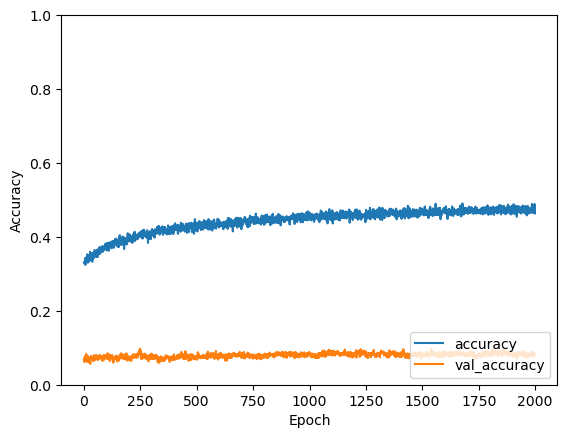

In [39]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()